# Visual exploratory data analysis
### Analyzing Police Activity with pandas
#### Career track : Data Analyts with Python
#### DataCamp - 2020
#### Karen Jimenez

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('data/police.csv')

## Calculating the hourly arrest rate

In [2]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

ri['stop_datetime'] = pd.to_datetime(combined)
ri['is_arrested'] = ri['is_arrested'].astype(bool)

ri.set_index('stop_datetime', inplace=True)

In [3]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.09025408486936048
stop_datetime
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


## Plotting the hourly arrest rate

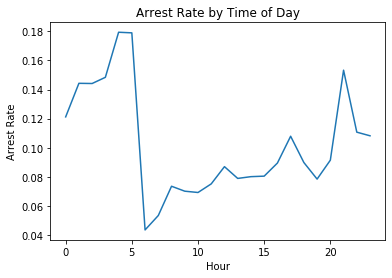

In [4]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

<i> The arrest rate has a significant spike overnight, and then dips in the early morning hours
<hr>

## Plotting drug-relate stops

stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


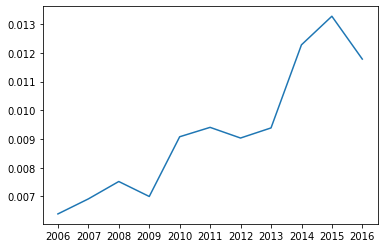

In [5]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
plt.plot(annual_drug_rate)

# Display the plot
plt.show()

<i> The rate of drug-related stops nearly doubled over the course of 10 years.
<hr>

## Comparing drug and search rates

<i> **Hypothesis:** the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.
<hr>

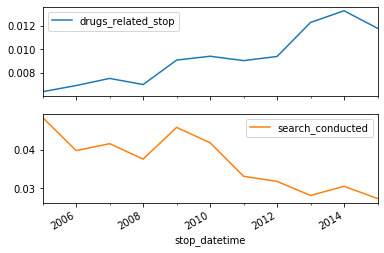

In [6]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

<i> The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.
<hr>

## Tallying violations by district

In [8]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)


violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [9]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  


## Plotting violations by district

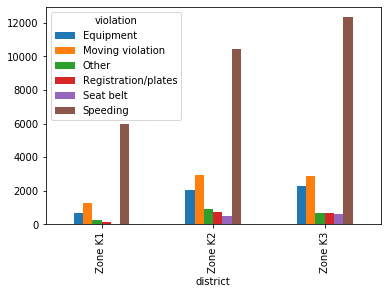

In [10]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind= 'bar')

# Display the plot
plt.show()

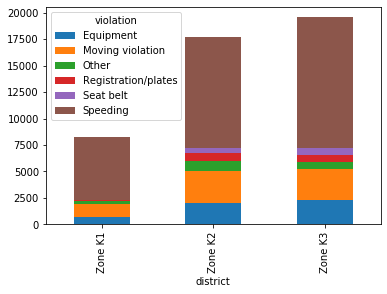

In [11]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

<i> The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.
<hr>

## Converting stop durations to numbers

In [13]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

# Print the unique values in 'stop_minutes'
print(ri['stop_minutes'])

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]
stop_datetime
2005-01-04 12:55:00     8.0
2005-01-23 23:15:00     8.0
2005-02-17 04:15:00     8.0
2005-02-20 17:15:00    23.0
2005-02-24 01:20:00     8.0
                       ... 
2015-12-31 21:21:00     8.0
2015-12-31 21:59:00     8.0
2015-12-31 22:04:00     8.0
2015-12-31 22:09:00     8.0
2015-12-31 22:47:00     8.0
Name: stop_minutes, Length: 91741, dtype: float64


## Plotting stop length

violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


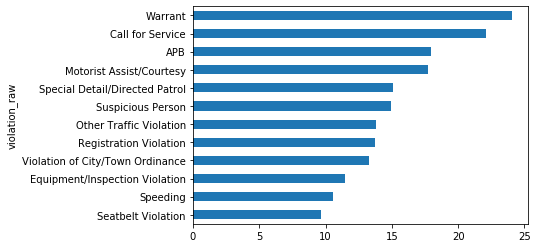

In [14]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

<i> Visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use violation_raw since it contains more detailed descriptions of the violations.
<hr>